# Demos: Lecture 14

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## Demo 1: Variational eigensolver

Below we construct the two-qubit Hamiltonian 

$$
\hat{H} = 0.5 Z \otimes Z + 1.5 X \otimes X
$$

and use the VQE to find its ground state energy.

In [2]:
coeffs = [0.5, 1.5]
ops = [qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliX(0) @ qml.PauliX(1)]

H = qml.Hamiltonian(coeffs, ops)

In [3]:
print(H)

  (0.5) [Z0 Z1]
+ (1.5) [X0 X1]


In [6]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def ansatz(theta):
    # a|01> + b|10>
    
    # |00>
    # RY(θ)|00> = cos(θ/2)|00> + sin(θ/2)|10>
    qml.RY(theta, wires=0)
    
    # CNOT(control on 0)  
    #  OR
    # X RY(θ)|00> = cos(θ/2)|01> + sin(θ/2)|11>
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    
    #return qml.state()
    return qml.expval(H)

In [7]:
# Run VQE
opt = qml.GradientDescentOptimizer()

param = np.array(0.0, requires_grad=True)

energies = []

for _ in range(200):
    param, _energy = opt.step_and_cost(ansatz, param)
    energies.append(_energy)

/home/olivia/Code/pennylane/pennylane/qnode.py:823: UserWarning: The device was switched during the call of the QNode, to avoid this behaviour definean interface argument instead of auto.
  warnings.warn(


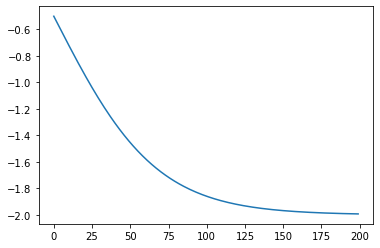

In [8]:
plt.plot(energies)

In [9]:
ansatz(param)

tensor(-1.99283622, requires_grad=True)

## Demo 2: VQE for the deuteron

Below is a Hamiltonian for a _real_ physical system: a deuteron. The ground state of this Hamiltonian is a linear combination of 4 basis states with *real-valued* coefficients, i.e.,

$$
|\psi_g\rangle = a |1000\rangle + b|0100\rangle + c |0010\rangle + d |0001\rangle
$$

**Exercise**: Implement the VQE to find the ground state energy of this Hamiltonian.

*Hint*: To create a suitable ansatz circuit, try generalizing the one from the previous demo.

In [3]:
coeffs = [28.657, 0.218, -6.125, -9.625, -13.125, -2.143, -3.913, -5.671, -2.143, -3.913, -5.671]

ops = [
    qml.Identity(0), 
    qml.PauliZ(0),
    qml.PauliZ(1),
    qml.PauliZ(2),
    qml.PauliZ(3),
    qml.PauliX(0) @ qml.PauliX(1),
    qml.PauliX(1) @ qml.PauliX(2),
    qml.PauliX(2) @ qml.PauliX(3),
    qml.PauliY(0) @ qml.PauliY(1),
    qml.PauliY(1) @ qml.PauliY(2),
    qml.PauliY(2) @ qml.PauliY(3)
]

H = qml.Hamiltonian(coeffs, ops)

In [ ]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def ansatz(theta):
    # We will go over the solution on Monday!
    
    return qml.expval(H)

In [ ]:
# Run VQE
opt = qml.GradientDescentOptimizer()

param = np.array(0.0, requires_grad=True)

energies = []

for _ in range(200):
    param, _energy = opt.step_and_cost(ansatz, param)
    energies.append(_energy)